<a href="https://colab.research.google.com/github/MM1026-DS/Deeplearningwork/blob/main/Neural_Networkweek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As usual you will follow the Deep Learning methodology to build the model:

1. Initialize parameters / Define hyperparameters
2. Loop for num_iterations:
    a. Forward propagation
    b. Compute cost function
    c. Backward propagation
    d. Update parameters (using parameters, and grads from backprop) 
4. Use trained parameters to predict labels

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```


In [ ]:

import numpy as np
import h5py
    
    
def load_dataset():
  train_dataset = h5py.File('train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File('test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes



In [ ]:
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


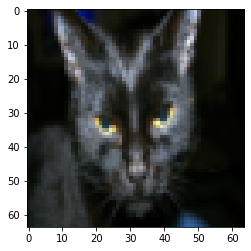

In [ ]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])

print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
m_train =  train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = len(train_set_x_orig[0])
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [ ]:
# train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
# test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])


## Step1 : change the image size w(a,b,c,d) = w(b*c*d,a)

In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T

test_set_x_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [ ]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


## Step 2 : Normalization of dataset

In [ ]:
train_set_x  = train_set_x_flatten/255

test_set_x =  test_set_x_flatten/255

## Algorith and explanation
<strong> <li>
<ol>z= wT*x + b</ol>
<ol> a = sigmoid(z)  </ol>
<ol> L(a,y) = -ylog(a)-(1-y)log(1-a) </ol>
<ol> cost fun = 1/M <span>&Sigma;</span> L(a,y) </ol> 

</li></strong>

In [ ]:
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### forward and backward propogation A,COST AND dw,db

In [ ]:
def propagate(w,b,X,Y):
   m = X.shape[1]
   #Activation function(we are taking one hidden layer neural network with logistic regression activation function)
   
   # Forward propagation
   A= sigmoid(np.dot(w.T,X)+b)
   cost = -(1/m)*(np.dot(Y,(np.log(A)).T) + np.dot((1-Y),(np.log(1-A)).T))

   #Backward propagation
   dw = 1/m *(np.dot(X,(A-Y).T))
   db = 1/m * np.sum(A-Y)

   assert(dw.shape == w.shape)
   assert(db.dtype == float)
   cost = np.squeeze(cost)
   assert(cost.shape == ())
    
   grads = {"dw": dw,
             "db": db}
    
   return grads, cost

   

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [ ]:
def optimize(w, b, X, Y, number_iterations, learning_rate, print_cost = False):
  costs = []
  for i in range(number_iterations):
    grads,cost = propagate(w,b,X,Y)
    
    dw = grads["dw"]
    db = grads["db"]
    
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    
  params = {"w": w,
              "b": b}
    
  grads = {"dw": dw,
             "db": db}
    
  return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, number_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [ ]:
def prediction(w,b,X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0], 1)
    
  
  A=sigmoid(np.dot(w.T,X)+b)
  

  # for i in range(A.shape[1]):
  #   if (A[0,i] >= 0.5):
  #     Y_predictions[0, i] = 1
  #   else:
  #     Y_predictions[0, i] = 0
  Y_predictions = (A >= 0.5) * 1.0
    

  assert(Y_predictions.shape ==(1,m) )
  return Y_predictions     




In [ ]:

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(prediction(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
def model(X_train,Y_train,X_test,Y_test,number_iterations = 2000,learning_rate=0.5,print_cost =  False):
  w,b = initialize_with_zeros(X_train.shape[0])
  params,grads,costs = optimize(w, b, X_train, Y_train, number_iterations, learning_rate, print_cost)
  w = params["w"]
  b = params["b"]

  Y_prediction_test = prediction(w,b,X_test)
  Y_prediction_train = prediction(w,b,X_train)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


  d = {"costs": costs,
       "Y_prediction_test": Y_prediction_test, 
       "Y_prediction_train" : Y_prediction_train, 
       "w" : w, 
       "b" : b,
       "learning_rate" : learning_rate,
       "num_iterations": number_iterations}
    
  return d

In [ ]:


d = model(train_set_x, train_set_y, test_set_x, test_set_y, number_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, it is a cat picture


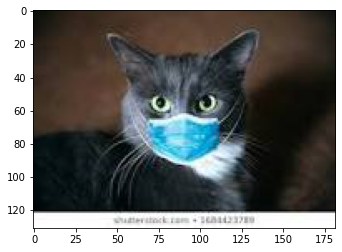

In [ ]:
from PIL import Image
img = Image.open("/content/cat_corona.jpg")
# img1 = plt.imshow(img)
arr = np.asarray(img)

my_img = Image.fromarray(arr).resize((num_px,num_px))

k = np.array(my_img).reshape((1,num_px*num_px*3)).T
k=k/255


# k = k.reshape((1,num_px*num_px*3)).T
 
# print(prediction(d["w"], d["b"],k))


my_predicted_image = prediction(d["w"], d["b"],k)
print("y = " + str(int(np.squeeze(my_predicted_image))) + ", it is a " + classes[int(np.squeeze(my_predicted_image))].decode("utf-8") + " picture")




plt.imshow(img);



y = 0, it is a non-cat picture


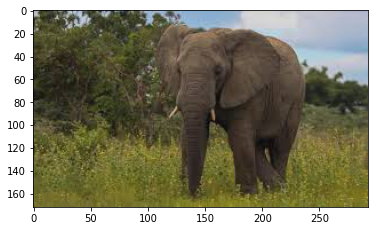

In [ ]:
from PIL import Image
img = Image.open("/content/elephant2.jpg")
# img1 = plt.imshow(img)
arr = np.asarray(img)

my_img = Image.fromarray(arr).resize((num_px,num_px))

k = np.array(my_img).reshape((1,num_px*num_px*3)).T
k=k/255


# k = k.reshape((1,num_px*num_px*3)).T
 
# print(prediction(d["w"], d["b"],k))


my_predicted_image = prediction(d["w"], d["b"],k)
print("y = " + str(int(np.squeeze(my_predicted_image))) + ", it is a " + classes[int(np.squeeze(my_predicted_image))].decode("utf-8") + " picture")




plt.imshow(img);


